In [1]:
#importing libraries 
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("cleaned_data.csv")
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,...,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,...,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,...,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,...,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,...,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12


In [4]:
df.shape

(14268893, 22)

In [5]:
#Q1 . When is the best time of day, day of the week, and time of year to fly to minimise delays?

In [6]:
#select the specfic columns
q1 = df[["Year", "Month","DayofMonth","DayOfWeek","DepTime","ArrDelay"]]
q1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay
0,2006,1,11,3,743.0,6.0
1,2006,1,11,3,1053.0,-5.0
2,2006,1,11,3,1915.0,-23.0
3,2006,1,11,3,1753.0,-8.0
4,2006,1,11,3,824.0,0.0


In [7]:
#only consider delays greater than 0
q1 = q1[q1["ArrDelay"]>0]
q1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay
0,2006,1,11,3,743.0,6.0
5,2006,1,11,3,627.0,2.0
6,2006,1,11,3,825.0,20.0
7,2006,1,11,3,942.0,7.0
12,2006,1,11,3,2045.0,5.0


In [8]:
# for the best time of the day a timeframe must be created with lambda

q1["Timeframe"] = q1["DepTime"].apply(lambda x: 
                                     "12am - 6am" if x<600 else 
                                     "6am - 12pm" if x>=600 and x<1200 else
                                     "12pm - 6pm" if x>=1200 and x<1800 else
                                     "6pm - 12am" if x>=1800 and x<=2359 else "none")
q1

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay,Timeframe
0,2006,1,11,3,743.0,6.0,6am - 12pm
5,2006,1,11,3,627.0,2.0,6am - 12pm
6,2006,1,11,3,825.0,20.0,6am - 12pm
7,2006,1,11,3,942.0,7.0,6am - 12pm
12,2006,1,11,3,2045.0,5.0,6pm - 12am
...,...,...,...,...,...,...,...
14268888,2007,12,15,6,1558.0,13.0,12pm - 6pm
14268889,2007,12,15,6,1902.0,5.0,6pm - 12am
14268890,2007,12,15,6,1024.0,15.0,6am - 12pm
14268891,2007,12,15,6,1353.0,36.0,12pm - 6pm


In [9]:
#
print(q1.groupby(["Timeframe"])["ArrDelay" ].mean().sort_values())
                                  
DayofTime= q1.groupby(["Timeframe"])["ArrDelay" ].mean().sort_values()

Timeframe
6am - 12pm    20.181734
12pm - 6pm    30.184659
6pm - 12am    44.944918
12am - 6am    51.260533
Name: ArrDelay, dtype: float64


In [10]:
DayofTime= q1.groupby(["Timeframe"])["ArrDelay" ].mean().sort_values()
DayofTime

Timeframe
6am - 12pm    20.181734
12pm - 6pm    30.184659
6pm - 12am    44.944918
12am - 6am    51.260533
Name: ArrDelay, dtype: float64

In [13]:
DayofTime=DayofTime.reset_index()
DayofTime

,index,Timeframe,ArrDelay
0,0,6am - 12pm,20.181734
1,1,12pm - 6pm,30.184659
2,2,6pm - 12am,44.944918
3,3,12am - 6am,51.260533


In [14]:
#6am to 12 pm is the best time to minimize flight delays


Text(0.5, 1.0, 'Flight Delays According to Time')

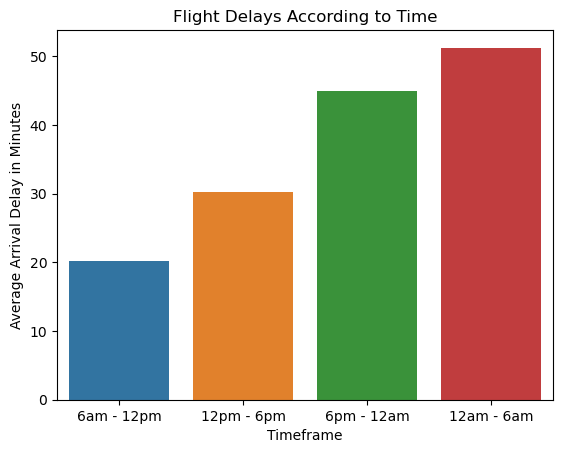

In [14]:
#a bar plot can be constructed to visualize this.
sns.barplot(data=DayofTime, x='Timeframe',y='ArrDelay')
plt.ylabel("Average Arrival Delay in Minutes")
plt.title('Flight Delays According to Time')

In [15]:
#to find the best day of the week
q1["Day"] = q1["DayOfWeek"].apply(lambda x: 
                                     "Monday" if x==1 else 
                                     "Tuesday" if x==2  else
                                     "Wednesday" if x==3 else
                                     "Thursday" if x==4 else
                                     "Friday"  if x==5 else
                                      "Saturday"if x==6 else
                                      "Sunday" if x==7 else "none")
                                       
q1                   


,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay,Timeframe,Day
0,2006,1,11,3,743.0,6.0,6am - 12pm,Wednesday
5,2006,1,11,3,627.0,2.0,6am - 12pm,Wednesday
6,2006,1,11,3,825.0,20.0,6am - 12pm,Wednesday
7,2006,1,11,3,942.0,7.0,6am - 12pm,Wednesday
12,2006,1,11,3,2045.0,5.0,6pm - 12am,Wednesday
...,...,...,...,...,...,...,...,...
14268888,2007,12,15,6,1558.0,13.0,12pm - 6pm,Saturday
14268889,2007,12,15,6,1902.0,5.0,6pm - 12am,Saturday
14268890,2007,12,15,6,1024.0,15.0,6am - 12pm,Saturday
14268891,2007,12,15,6,1353.0,36.0,12pm - 6pm,Saturday


In [31]:

BestDay=q1.groupby(["Day"])["ArrDelay"].mean().sort_values()
BestDay

Day
Saturday     28.150377
Tuesday      29.537804
Wednesday    30.972463
Sunday       31.391202
Monday       31.549314
Friday       33.140599
Thursday     33.392849
Name: ArrDelay, dtype: float64

In [33]:
BestDay=BestDay.reset_index()
BestDay= BestDay.iloc[[4,1,2,6,5,0,3]]
BestDay

,index,Day,ArrDelay
4,4,Monday,31.549314
1,1,Tuesday,29.537804
2,2,Wednesday,30.972463
6,6,Thursday,33.392849
5,5,Friday,33.140599
0,0,Saturday,28.150377
3,3,Sunday,31.391202


In [33]:
#Saturday is best day of the week 



D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Flight Delays According to Day')

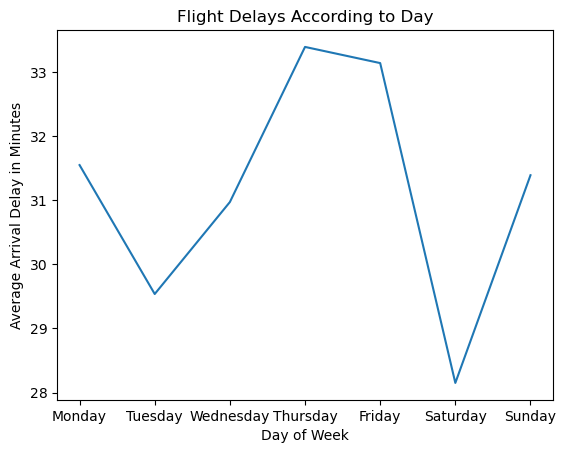

In [34]:
#a lineplot  can be plotted for this.
sns.lineplot( BestDay['Day'], BestDay['ArrDelay'])
plt.xlabel("Day of Week")
plt.ylabel("Average Arrival Delay in Minutes")
plt.title('Flight Delays According to Day')

In [21]:
#best time of the year - We find the best season and the best month
q1["TimeOfYear"] = q1["Month"].apply(lambda x: 
                                    "Autumn" if  x>=9 and x<=11 else 
                                    "Spring" if x>=3 and x<=5 else 
                                    "Summer" if x>=6 and x<=8 else  "Winter")


In [22]:
q1.groupby(["TimeOfYear"])["ArrDelay"].mean().sort_values()

TimeOfYear
Autumn    28.866053
Spring    29.275680
Winter    32.221300
Summer    34.495402
Name: ArrDelay, dtype: float64

In [23]:
#Autumn is the best season of the year to minimise delays

In [24]:
q1.groupby(["Month"])["ArrDelay"].mean().sort_values()

Month
11    28.054863
5     28.175481
9     28.791311
4     28.872843
1     29.537972
10    29.646670
3     30.682549
2     31.640478
8     32.693386
7     34.881525
12    34.953670
6     35.851373
Name: ArrDelay, dtype: float64

In [25]:
#November is the best month to minmise delays

In [26]:
q1["Month"] = q1["Month"].apply(lambda x: 
                                     "January" if x==1 else 
                                     "February" if x==2  else
                                     "March" if x==3 else
                                     "April" if x==4 else
                                     "May"  if x==5 else
                                      "June"if x==6 else
                                      "July" if x==7 else
                                      "August" if x==8 else
                                      "September"if x==9 else
                                      "October"  if x==10 else
                                       "November" if x==11 else
                                       "December" if x==12 else
                                         'None')

Text(0.5, 1.0, 'Flight Delays According to Month')

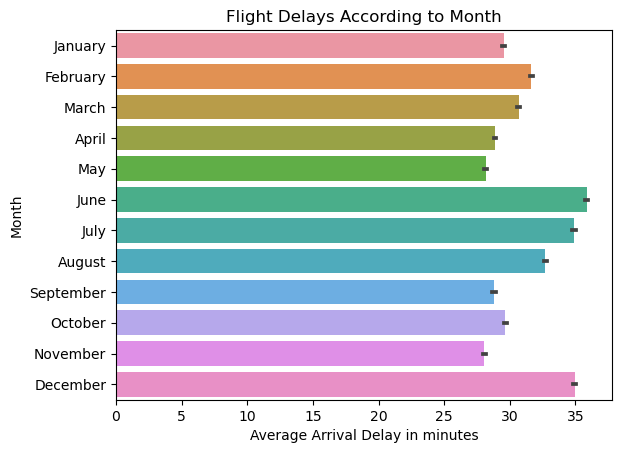

In [27]:
#A horizontal barplot can be plotted 
sns.barplot(data=q1, x='ArrDelay',y='Month')
plt.xlabel("Average Arrival Delay in minutes")
plt.ylabel("Month")
plt.title('Flight Delays According to Month')